In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


sns.set(style="ticks")
%matplotlib inline

In [2]:
df=pd.read_csv('train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.shape

(8523, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
## Item_Visibility has many 0 values, we need to handle them

count=(df['Item_Visibility']==0).sum()
percent=count*100/len(df['Item_Visibility'])
print('Zeroes in Item_Visibility : {}, {} % '.format(count,round(percent)))

Zeroes in Item_Visibility : 526, 6.0 % 


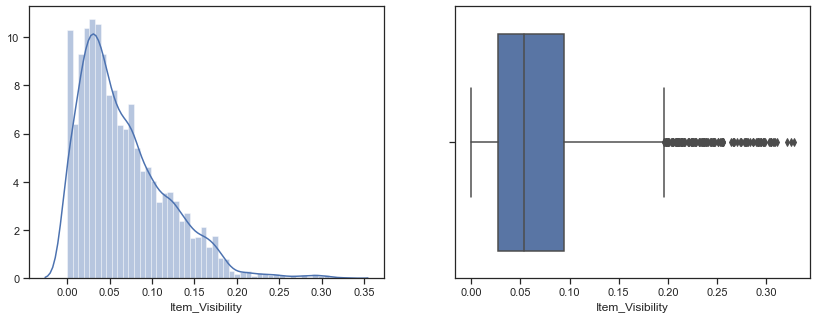

In [7]:
## distribution of Item_Visibility 
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(14,5))
sns.distplot(df['Item_Visibility'],ax=axs[0])
sns.boxplot(df['Item_Visibility'],ax=axs[1])
plt.show()

In [8]:
print('Mean in Item_Visibility : ',np.mean(df['Item_Visibility']))
print('Median in Item_Visibility : ',np.median(df['Item_Visibility']))

Mean in Item_Visibility :  0.06613202877895127
Median in Item_Visibility :  0.053930934


In [9]:
## replace zeroes in Item_Visibility with mean
df['Item_Visibility'].replace(0, np.mean(df['Item_Visibility']), inplace=True)

In [10]:
df['Item_Visibility'].describe()

count    8523.000000
mean        0.070213
std         0.048742
min         0.003575
25%         0.033085
50%         0.062517
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [11]:
## check null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## Handle Missing Values

In [12]:
round(df.isnull().sum()/len(df)*100)

Item_Identifier               0.0
Item_Weight                  17.0
Item_Fat_Content              0.0
Item_Visibility               0.0
Item_Type                     0.0
Item_MRP                      0.0
Outlet_Identifier             0.0
Outlet_Establishment_Year     0.0
Outlet_Size                  28.0
Outlet_Location_Type          0.0
Outlet_Type                   0.0
Item_Outlet_Sales             0.0
dtype: float64

#### Percentage of null values
- Item_Weight (Numeric) - 17%
- Outlet_Size (Categorical) - 28%

In [13]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [14]:
## Item_Weight can be replaced my the mean weight of its Item_Itentifier

item_weight_means=df.pivot_table(index='Item_Identifier',values='Item_Weight',aggfunc='mean')
item_weight_means

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [15]:
miss_bool_iweight = df['Item_Weight'].isnull()
miss_bool_iweight

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [16]:
for i, item in enumerate(df['Item_Identifier']):
    if miss_bool_iweight[i]:
        if item in item_weight_means:
            df['Item_Weight'][i] = item_weight_means.loc[item]['Item_Weight']
        else:
            df['Item_Weight'][i] = np.mean(df['Item_Weight'])

C:\Users\WINDOWS\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
df['Item_Weight'].isnull().sum()

0

In [18]:
### Outlet_Size null vales can be replaced by mode of its Outlet_Type

outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [19]:
miss_bool = df['Outlet_Size'].isnull()
df.loc[miss_bool, 'Outlet_Size'] = df.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [20]:
df['Outlet_Size'].isnull().sum()

0

In [21]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Data Preprocessing

In [22]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [23]:
## unique values in each column
for column in df:
    if len(df[column].unique())<=20:
        print(column,' : ', df[column].unique())

Item_Fat_Content  :  ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Type  :  ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier  :  ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Establishment_Year  :  [1999 2009 1998 1987 1985 2002 2007 1997 2004]
Outlet_Size  :  ['Medium' 'Small' 'High']
Outlet_Location_Type  :  ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type  :  ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [24]:
## change Item_Fat_Content values to proper format
df['Item_Fat_Content'].replace('low fat', 'Low Fat', inplace=True)
df['Item_Fat_Content'].replace('LF', 'Low Fat', inplace=True)
df['Item_Fat_Content'].replace('reg', 'Regular', inplace=True)

In [25]:
for column in df:
    if len(df[column].unique())<=20:
        print(column, df[column].unique())

Item_Fat_Content ['Low Fat' 'Regular']
Item_Type ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Establishment_Year [1999 2009 1998 1987 1985 2002 2007 1997 2004]
Outlet_Size ['Medium' 'Small' 'High']
Outlet_Location_Type ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [26]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [27]:
## Fix Item_Identifier
df['Item_Identifier'].apply(lambda x:x[:2])

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: Item_Identifier, Length: 8523, dtype: object

In [28]:
### remove numbers from for Item_Identier 
df['Item_Identifier']=df['Item_Identifier'].apply(lambda x:x[:2])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NC,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [29]:
df['Item_Identifier'].unique()

### FD: food, DR: Drinks, NC: Non-Consumable

array(['FD', 'DR', 'NC'], dtype=object)

In [30]:
## check Item_Fat_Content and Item_Type for non-consumables
print('Item Type for non-consumables :  ',df[df['Item_Identifier']=='NC']['Item_Type'].unique())
print('Item Fat Content for non-consumables :  ',df[df['Item_Identifier']=='NC']['Item_Fat_Content'].unique())

Item Type for non-consumables :   ['Household' 'Health and Hygiene' 'Others']
Item Fat Content for non-consumables :   ['Low Fat']


In [31]:
# replace Fat_Content for all rows where Item_Itenfier is NC with Non Edible
df.loc[df['Item_Identifier']=="NC",'Item_Fat_Content']='Non Edible'
df[df['Item_Identifier']=='NC']['Item_Fat_Content'].unique()

array(['Non Edible'], dtype=object)

In [32]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NC,8.93,Non Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [33]:
# create new column to get no of years store has been open till 2013 (dataset is from 2013)
df['Outlet_Age']=2013-df['Outlet_Establishment_Year']
df=df.drop(columns=['Outlet_Establishment_Year'])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FD,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FD,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FD,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,15
4,NC,8.93,Non Edible,0.066132,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,26


## Univariate Analysis

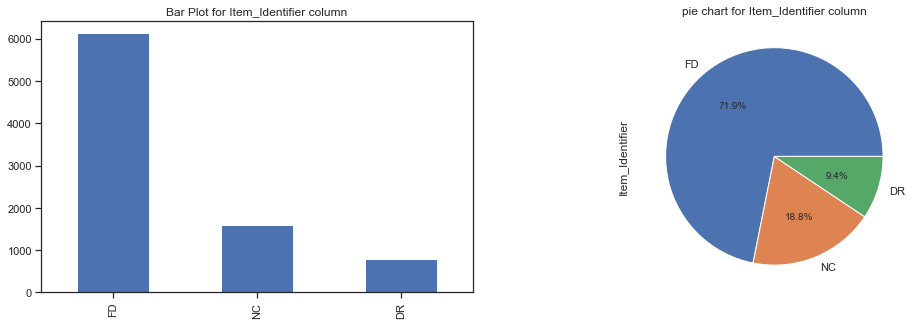

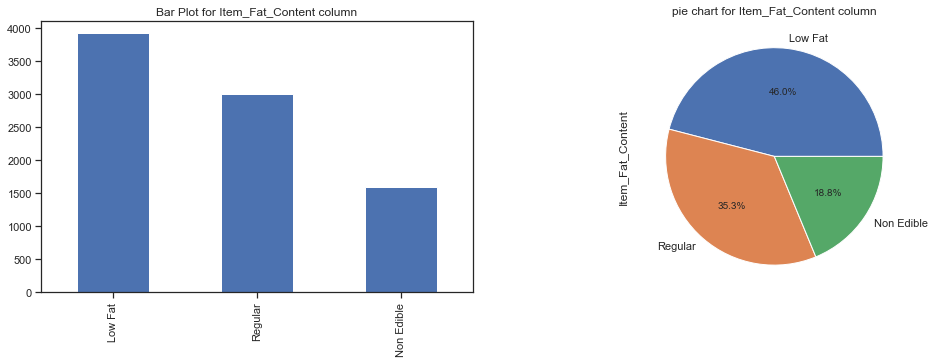

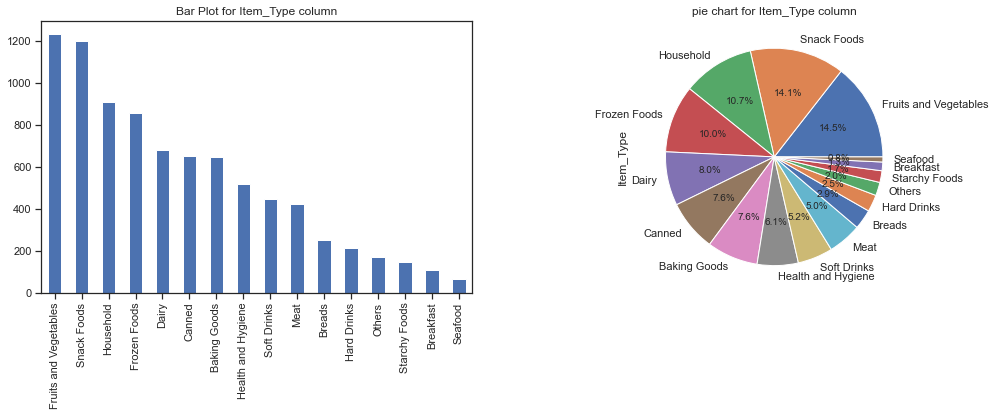

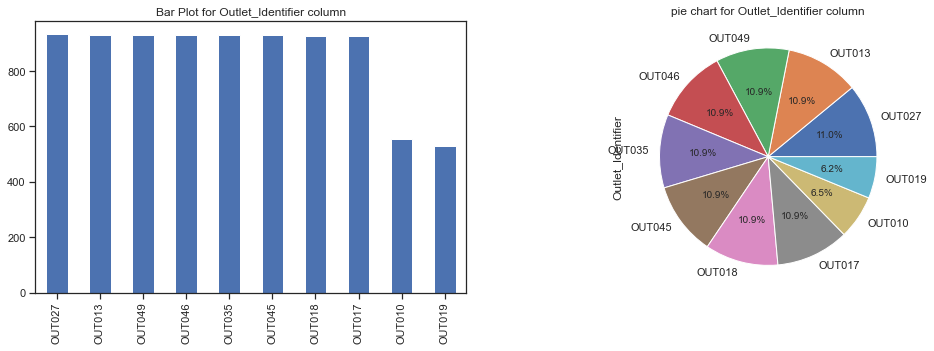

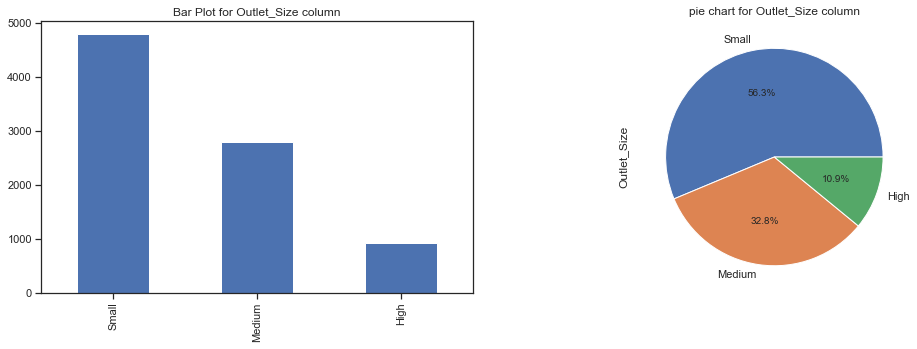

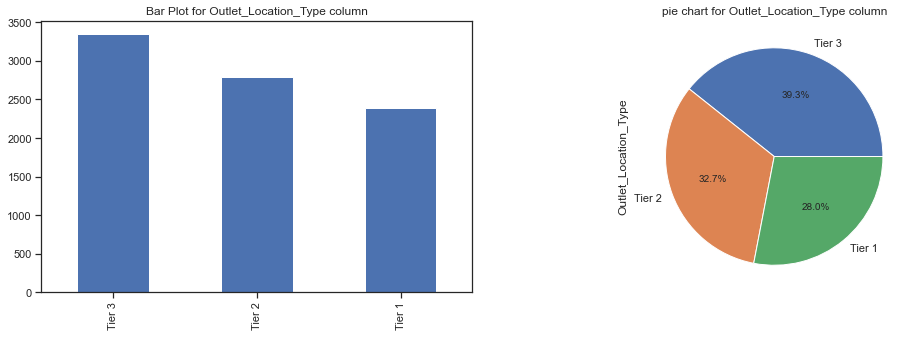

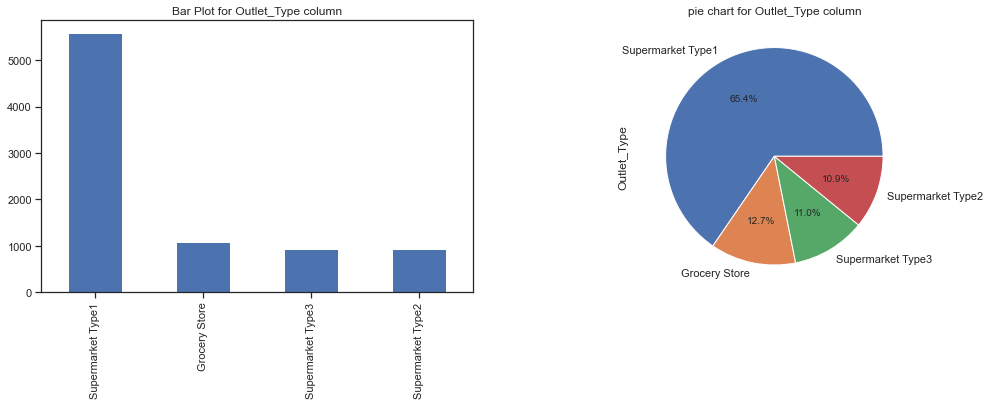

In [34]:
#categorical columns
for col in df.select_dtypes(include=object):
    fig=plt.figure(figsize=(17,5))
    ax0=fig.add_subplot(121)
    df[col].value_counts().plot.bar()
    plt.title("Bar Plot for {} column".format(col))
    
    ax1=fig.add_subplot(122)
    sm=df[col].value_counts().index
    df[col].value_counts().plot.pie(labels=sm,autopct='%1.1f%%')
    plt.title("pie chart for {} column".format(col))
    plt.show()

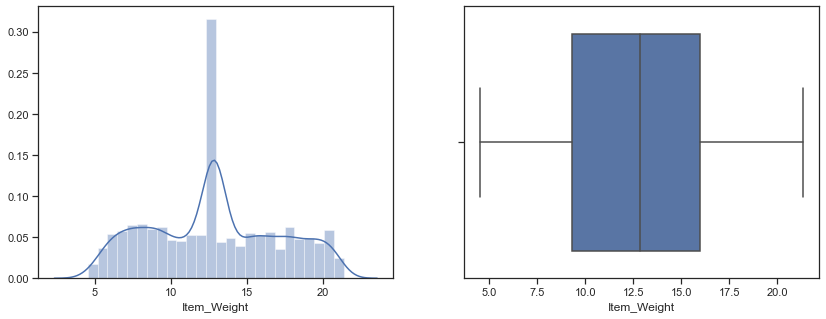

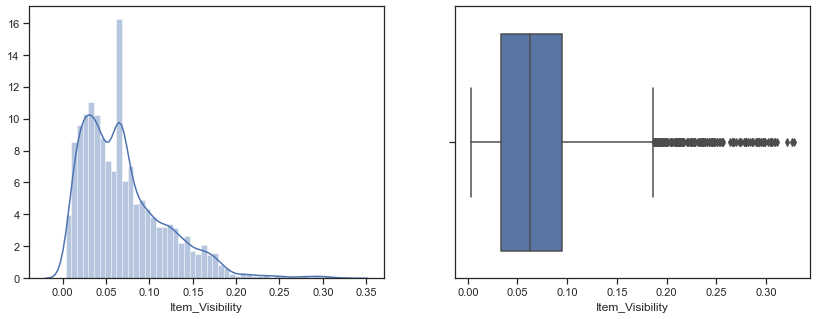

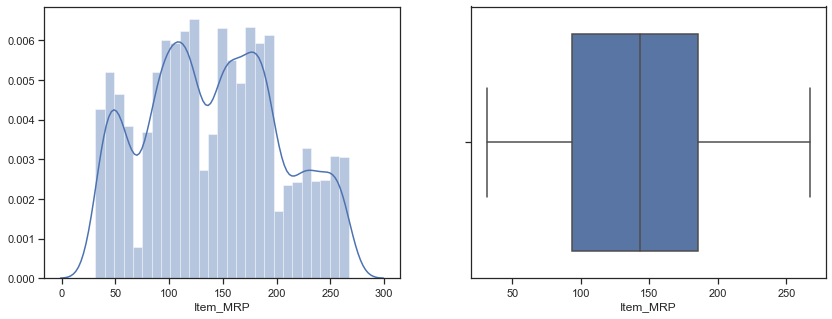

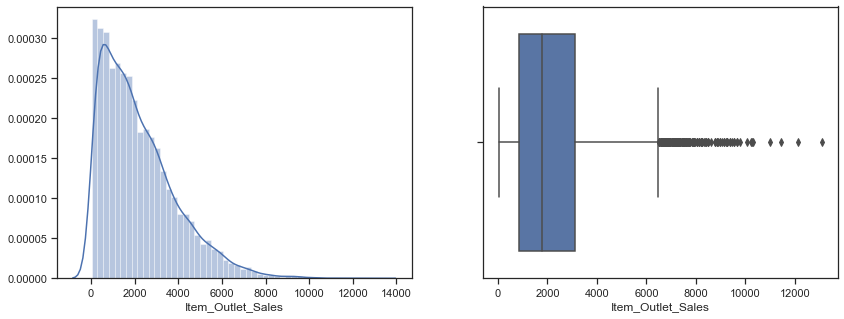

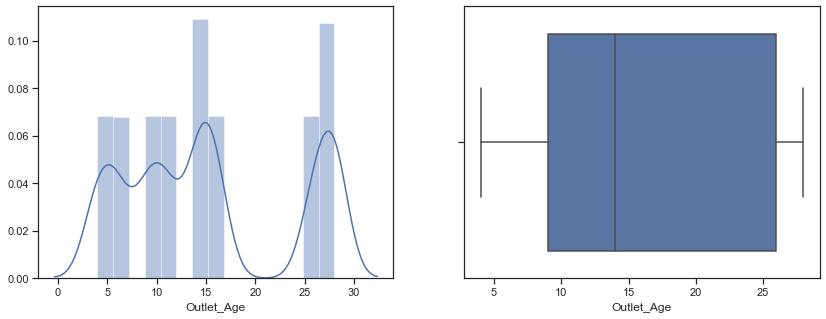

In [35]:
# numeric columns
for col in df.select_dtypes(exclude=object):
    fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(14,5))
    sns.distplot(df[col],ax=axs[0])
    sns.boxplot(df[col],ax=axs[1])
    plt.show()

## Bivariate Analysis

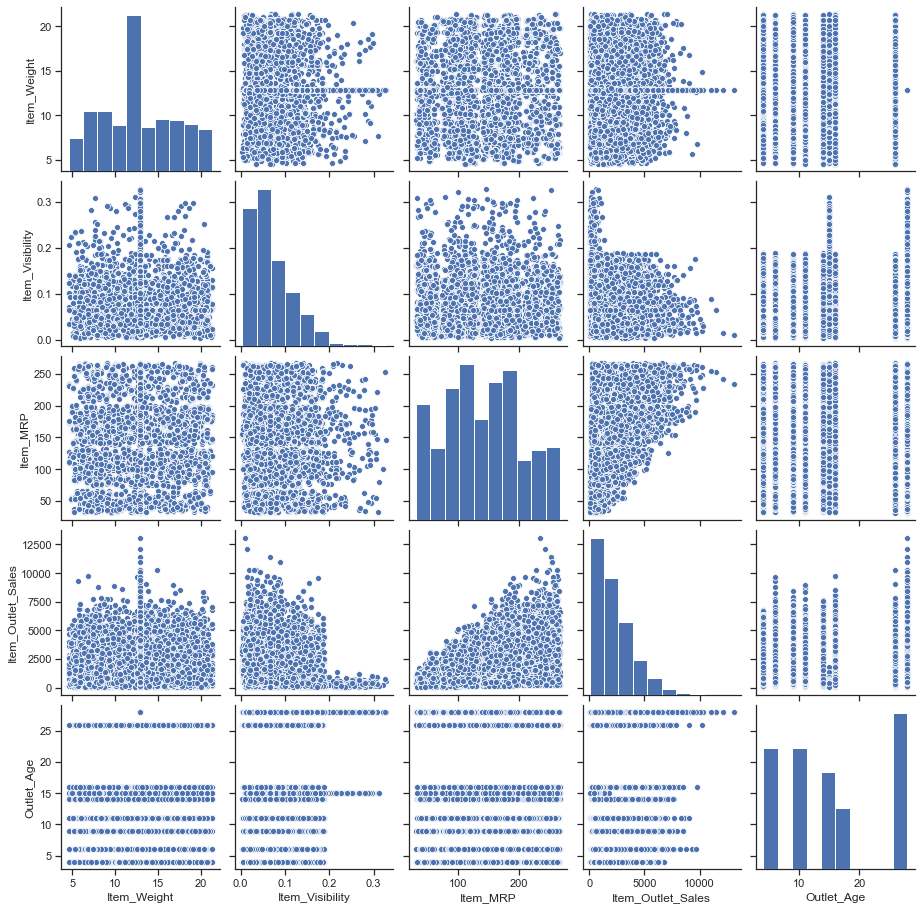

In [36]:
sns.pairplot(df)

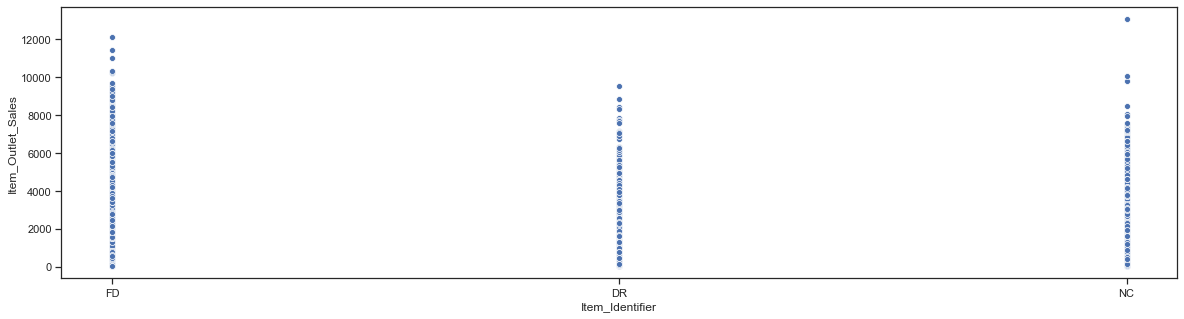

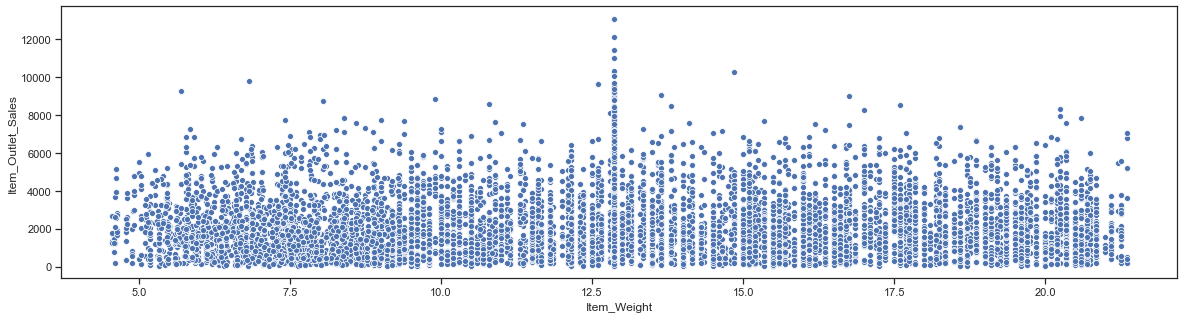

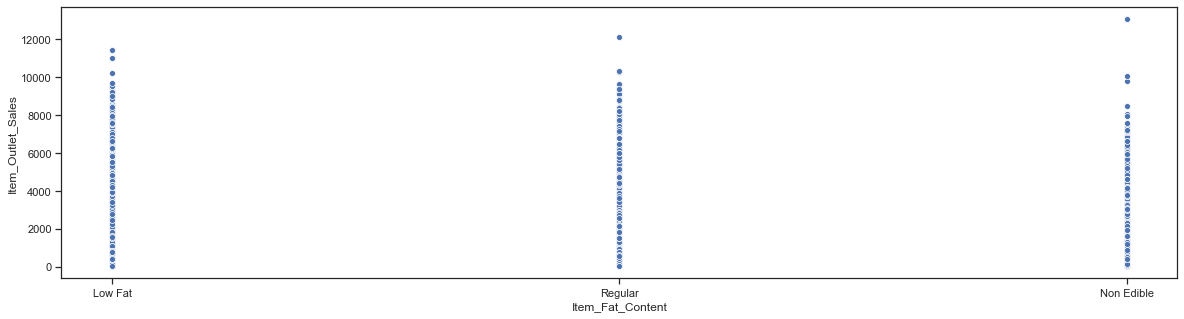

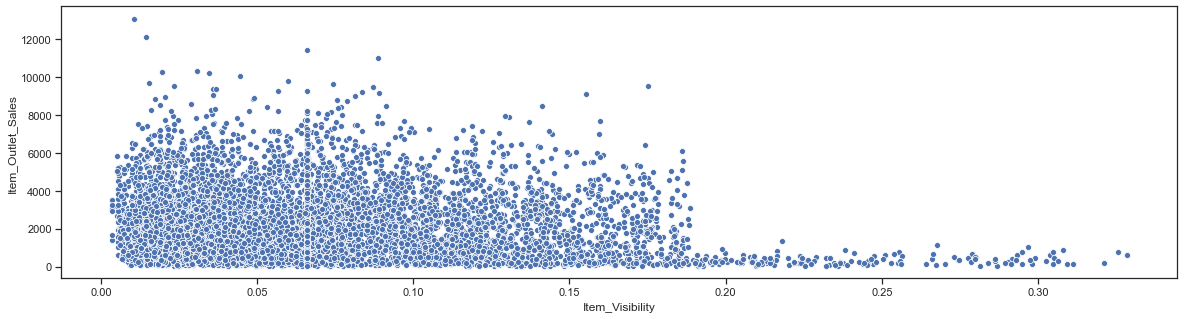

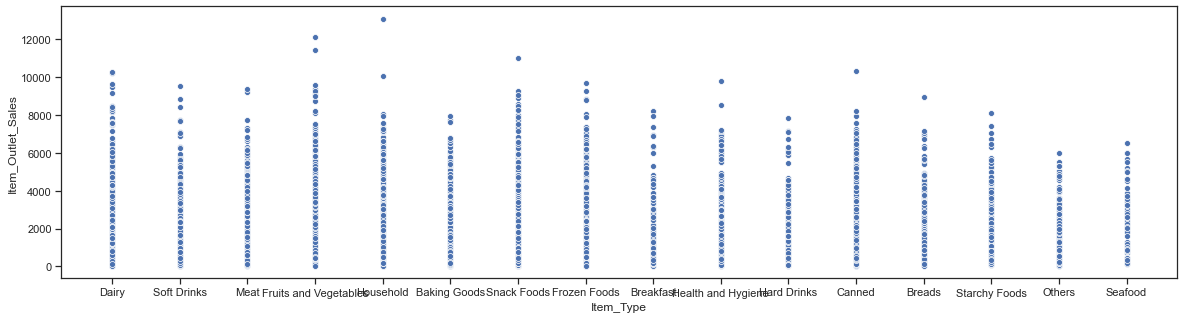

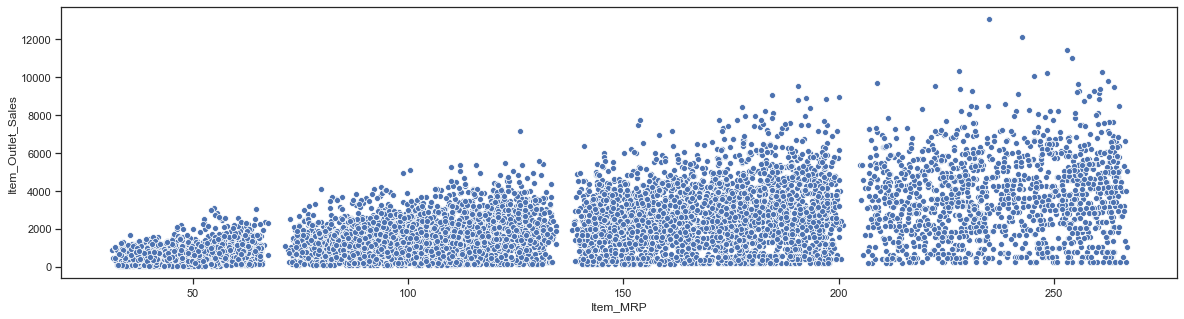

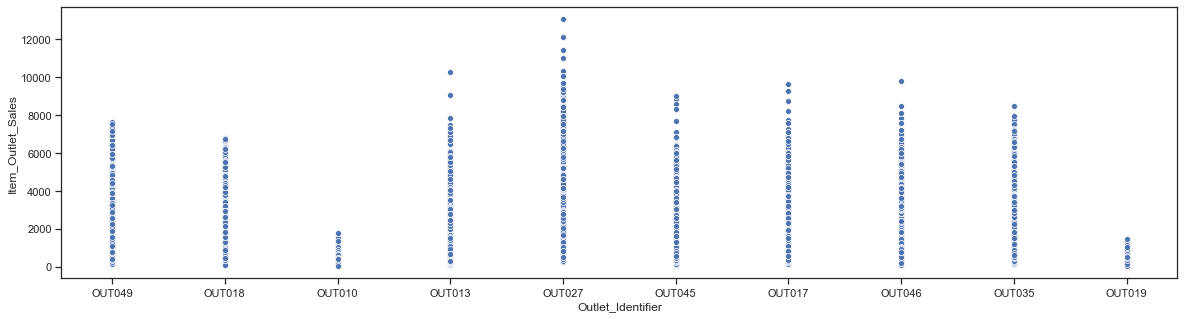

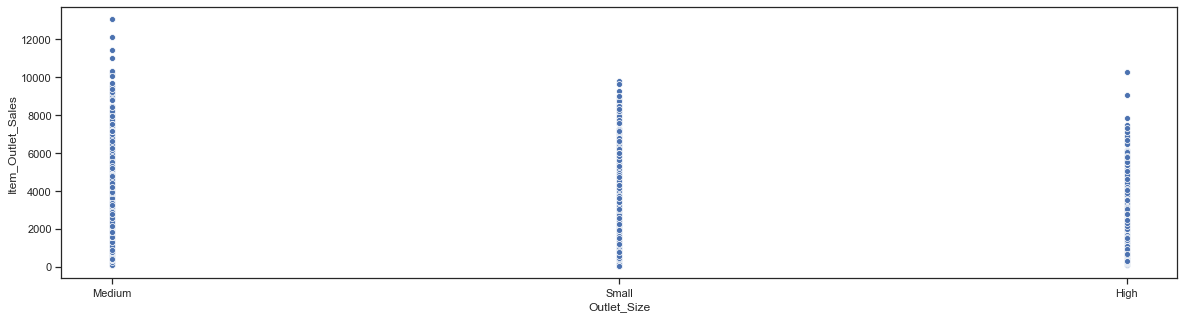

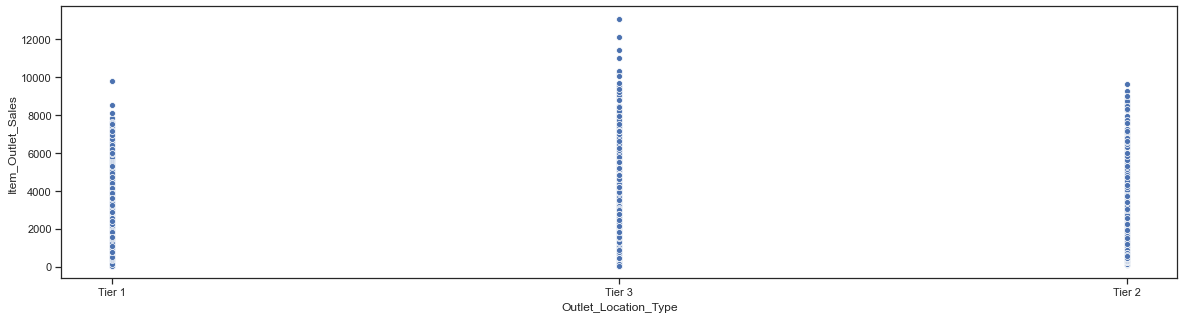

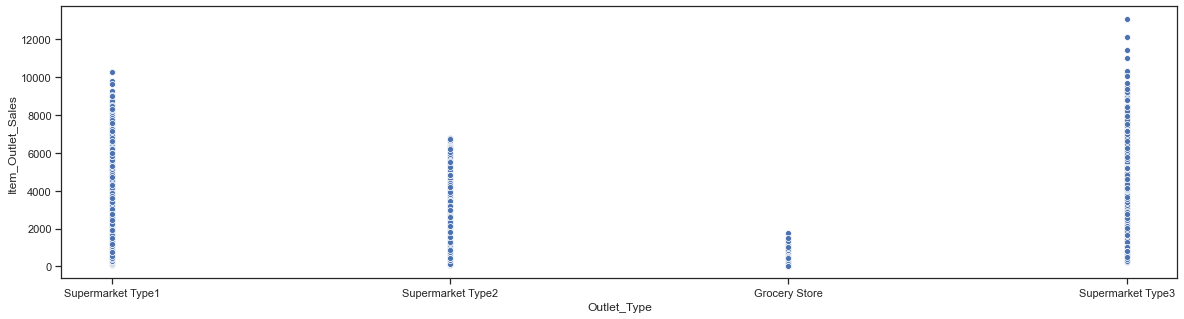

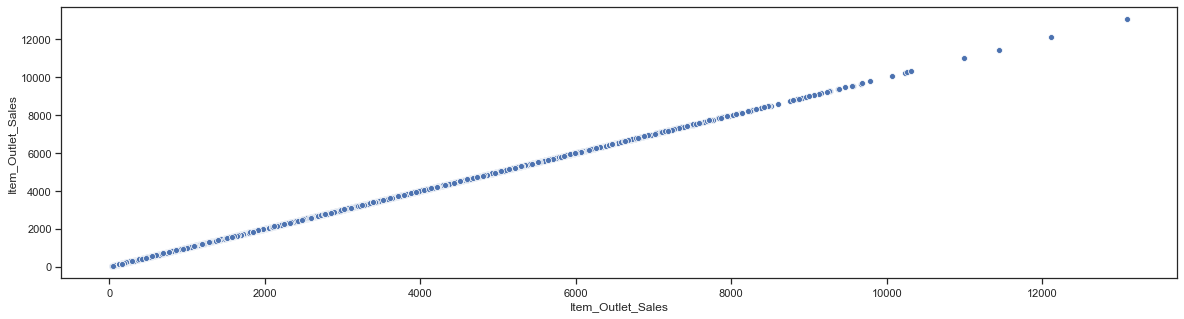

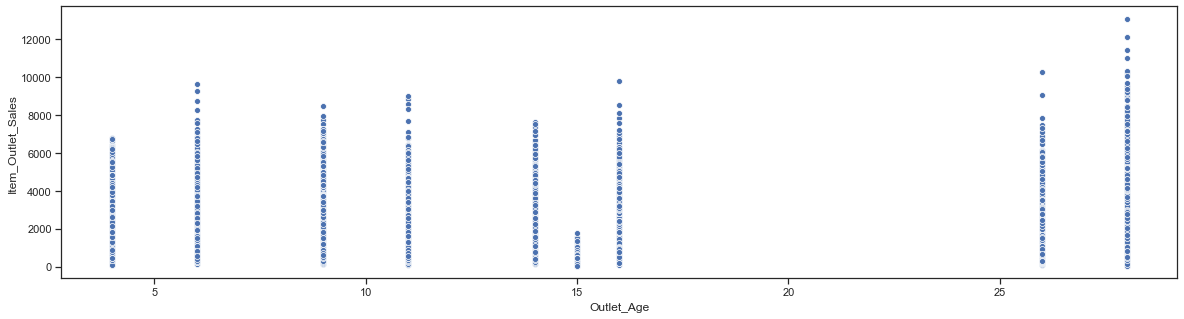

In [37]:
for column in df:
    plt.figure(figsize=(20,5))
    sns.scatterplot(data=df, x=column, y='Item_Outlet_Sales')
    plt.show()

In [38]:
# average sales of each output type
pd.DataFrame(df.groupby('Outlet_Type').mean()['Item_Outlet_Sales'].sort_values(ascending=False))

,Item_Outlet_Sales
Outlet_Type,
Supermarket Type3,3694.038558
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Grocery Store,339.828500


In [39]:
# average sales of each outlet location type
pd.DataFrame(df.groupby('Outlet_Location_Type').mean()['Item_Outlet_Sales'].sort_values(ascending=False))

,Item_Outlet_Sales
Outlet_Location_Type,
Tier 2,2323.990559
Tier 3,2279.627651
Tier 1,1876.909159


In [40]:
# average sales of each outlet size
pd.DataFrame(df.groupby('Outlet_Size').mean()['Item_Outlet_Sales'].sort_values(ascending=False))

,Item_Outlet_Sales
Outlet_Size,
Medium,2681.603542
High,2298.995256
Small,1867.182814


In [41]:
#average sales of each outlet identifier
pd.DataFrame(df.groupby('Outlet_Identifier').mean()['Item_Outlet_Sales'].sort_values(ascending=False))

,Item_Outlet_Sales
Outlet_Identifier,
OUT027,3694.038558
OUT035,2438.841866
OUT049,2348.354635
OUT017,2340.675263
OUT013,2298.995256
OUT046,2277.844267
OUT045,2192.384798
OUT018,1995.498739
OUT019,340.329723


In [42]:
pd.DataFrame(df.groupby(['Outlet_Type', 'Outlet_Identifier']).size(), columns=['Size'])

Size
Outlet_Type       Outlet_Identifier      
Grocery Store     OUT010              555
                  OUT019              528
Supermarket Type1 OUT013              932
                  OUT017              926
                  OUT035              930
                  OUT045              929
                  OUT046              930
                  OUT049              930
Supermarket Type2 OUT018              928
Supermarket Type3 OUT027              935

In [43]:
pd.DataFrame(df.groupby(['Outlet_Type', 'Outlet_Size']).size(), columns=['Size'])

Size
Outlet_Type       Outlet_Size      
Grocery Store     Small        1083
Supermarket Type1 High          932
                  Medium        930
                  Small        3715
Supermarket Type2 Medium        928
Supermarket Type3 Medium        935

In [44]:
pd.DataFrame(df.groupby(['Outlet_Location_Type', 'Outlet_Type']).size(), columns=['Size'])

Size
Outlet_Location_Type Outlet_Type            
Tier 1               Grocery Store       528
                     Supermarket Type1  1860
Tier 2               Supermarket Type1  2785
Tier 3               Grocery Store       555
                     Supermarket Type1   932
                     Supermarket Type2   928
                     Supermarket Type3   935

<AxesSubplot:>

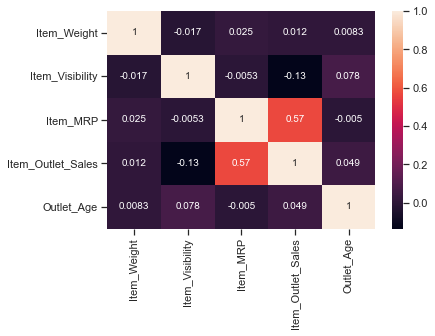

In [45]:
sns.heatmap(df.corr(), annot=True)

In [46]:
# drop unncessary columns - Item_Type, Item_Weight, Outlet_Identifier

df.drop(['Item_Type','Item_Weight','Outlet_Identifier'],inplace=True,axis=1)
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FD,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DR,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FD,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FD,Regular,0.066132,182.0950,Small,Tier 3,Grocery Store,732.3800,15
4,NC,Non Edible,0.066132,53.8614,High,Tier 3,Supermarket Type1,994.7052,26


In [47]:
data=df.copy()
data.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FD,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DR,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FD,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FD,Regular,0.066132,182.0950,Small,Tier 3,Grocery Store,732.3800,15
4,NC,Non Edible,0.066132,53.8614,High,Tier 3,Supermarket Type1,994.7052,26


## Encoding Categorical Values

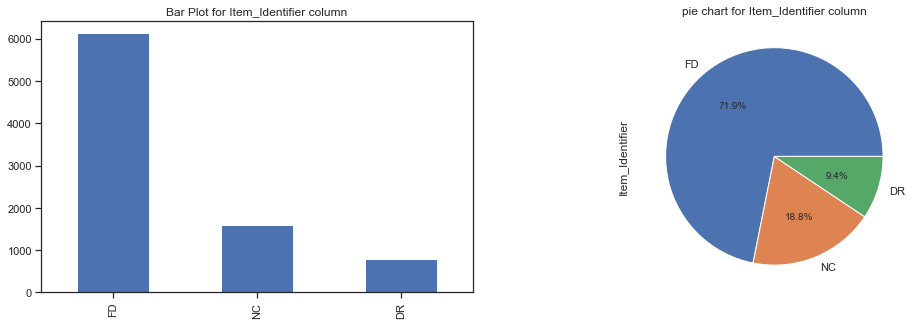

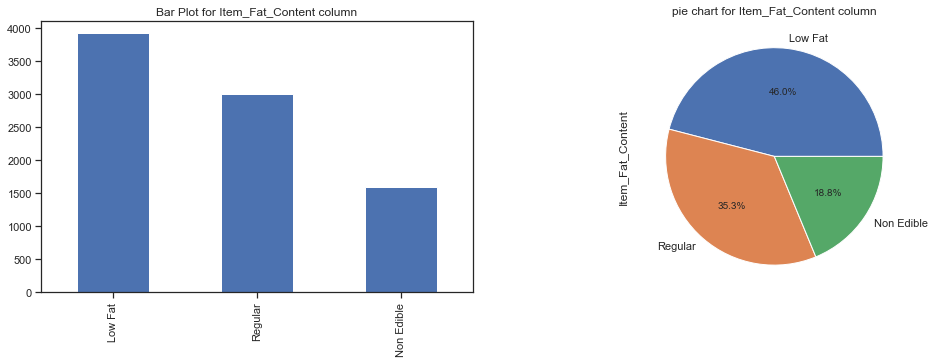

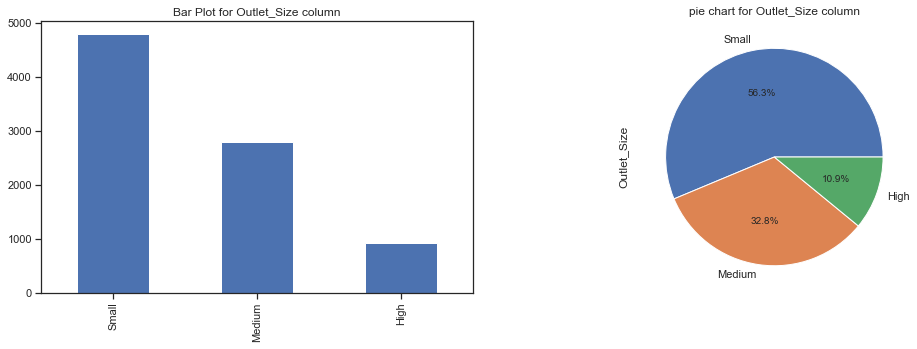

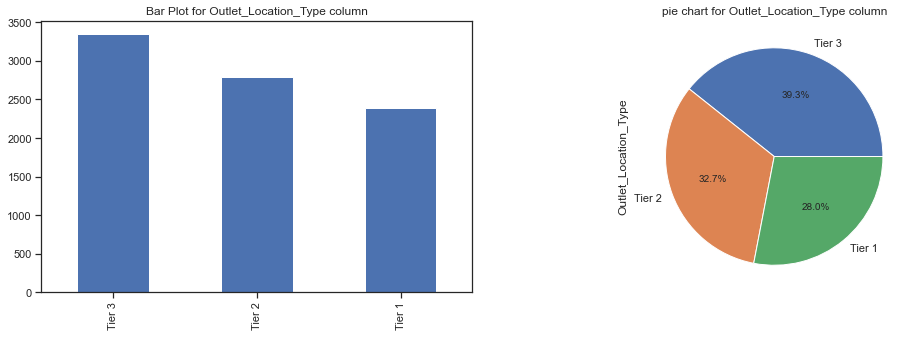

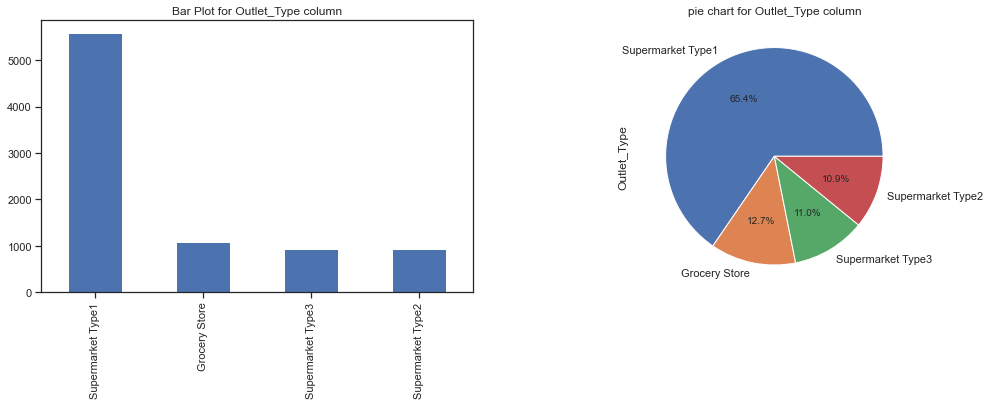

In [48]:
#categorical columns
for col in data.select_dtypes(include=object):
    fig=plt.figure(figsize=(17,5))
    ax0=fig.add_subplot(121)
    data[col].value_counts().plot.bar()
    plt.title("Bar Plot for {} column".format(col))
    
    ax1=fig.add_subplot(122)
    sm=data[col].value_counts().index
    data[col].value_counts().plot.pie(labels=sm,autopct='%1.1f%%')
    plt.title("pie chart for {} column".format(col))
    plt.show()   

In [49]:
## label encoding Outlet_Size
data['Outlet_Size']=data['Outlet_Size'].map({'Small':0, 'Medium': 1, 'High': 2})
data.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FD,Low Fat,0.016047,249.8092,1,Tier 1,Supermarket Type1,3735.1380,14
1,DR,Regular,0.019278,48.2692,1,Tier 3,Supermarket Type2,443.4228,4
2,FD,Low Fat,0.016760,141.6180,1,Tier 1,Supermarket Type1,2097.2700,14
3,FD,Regular,0.066132,182.0950,0,Tier 3,Grocery Store,732.3800,15
4,NC,Non Edible,0.066132,53.8614,2,Tier 3,Supermarket Type1,994.7052,26


In [50]:
## one-hot encoding other categorical columns 
onehot_col=['Item_Identifier','Item_Fat_Content', 'Outlet_Type', 'Outlet_Location_Type']
for col in onehot_col:
    dummies=pd.get_dummies(data[col],prefix=col,drop_first=True)
    data=pd.concat([data,dummies],axis=1)
    data.drop(col,inplace=True,axis=1)

In [51]:
data.head()

,Item_Visibility,Item_MRP,Outlet_Size,Item_Outlet_Sales,Outlet_Age,Item_Identifier_FD,Item_Identifier_NC,Item_Fat_Content_Non Edible,Item_Fat_Content_Regular,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,0.016047,249.8092,1,3735.1380,14,1,0,0,0,1,0,0,0,0
1,0.019278,48.2692,1,443.4228,4,0,0,0,1,0,1,0,0,1
2,0.016760,141.6180,1,2097.2700,14,1,0,0,0,1,0,0,0,0
3,0.066132,182.0950,0,732.3800,15,1,0,0,1,0,0,0,0,1
4,0.066132,53.8614,2,994.7052,26,0,1,1,0,1,0,0,0,1


## Correlation

<AxesSubplot:>

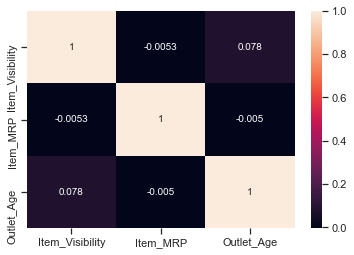

In [54]:
sns.heatmap(data[num_cols].corr(), annot=True)

## Scaling numeric columns

In [55]:
num_cols=['Item_Visibility', 'Item_MRP', 'Outlet_Age']
num_df=data[num_cols]
cat_output_df=data.drop(columns=num_cols) #categorical and output columns

In [56]:
scaler=StandardScaler()
num_array=scaler.fit_transform(num_df)
num_df=pd.DataFrame(num_array, columns=num_df.columns)
num_df.head()

,Item_Visibility,Item_MRP,Outlet_Age
0,-1.111358,1.747454,-0.139541
1,-1.045067,-1.489023,-1.334103
2,-1.096733,0.010040,-0.139541
3,-0.083740,0.660050,-0.020085
4,-0.083740,-1.399220,1.293934


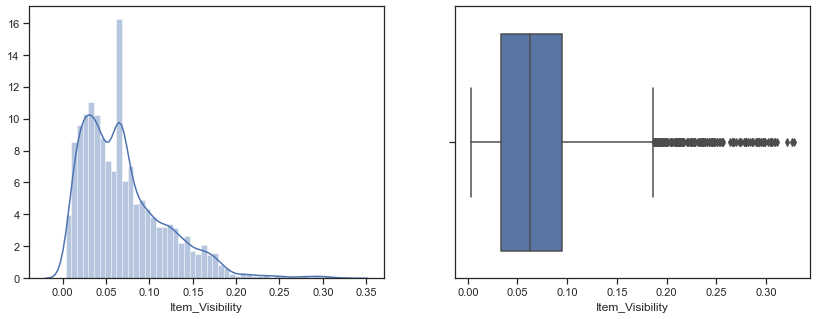

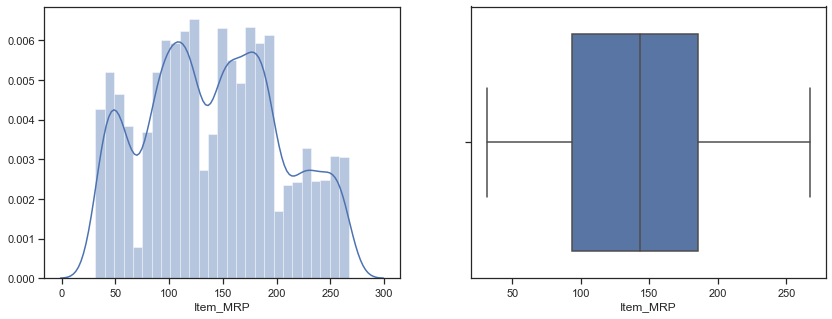

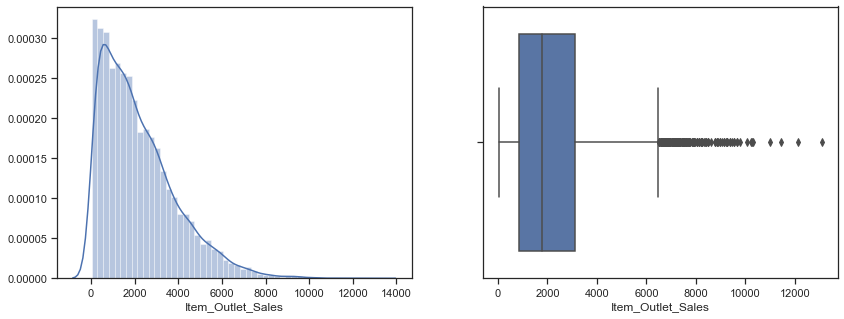

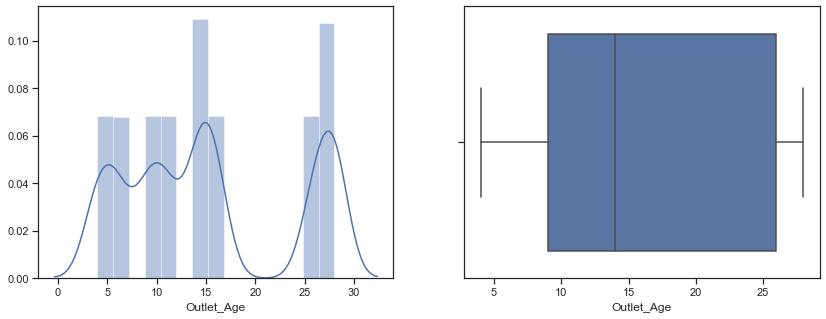

In [59]:
for col in df.select_dtypes(exclude=object):
    fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(14,5))
    sns.distplot(df[col],ax=axs[0])
    sns.boxplot(df[col],ax=axs[1])
    plt.show()

In [63]:
final_df=pd.concat([num_df, cat_output_df], axis=1)

In [64]:
final_df.head()

,Item_Visibility,Item_MRP,Outlet_Age,Outlet_Size,Item_Outlet_Sales,Item_Identifier_FD,Item_Identifier_NC,Item_Fat_Content_Non Edible,Item_Fat_Content_Regular,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,-1.111358,1.747454,-0.139541,1,3735.1380,1,0,0,0,1,0,0,0,0
1,-1.045067,-1.489023,-1.334103,1,443.4228,0,0,0,1,0,1,0,0,1
2,-1.096733,0.010040,-0.139541,1,2097.2700,1,0,0,0,1,0,0,0,0
3,-0.083740,0.660050,-0.020085,0,732.3800,1,0,0,1,0,0,0,0,1
4,-0.083740,-1.399220,1.293934,2,994.7052,0,1,1,0,1,0,0,0,1


## Model Evaluation

In [65]:
X = final_df.drop(columns=['Item_Outlet_Sales'])
y = final_df['Item_Outlet_Sales']

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train the model
    model.fit(X, y)
    
    # predict the training set
    pred = model.predict(X)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("MSE:",mean_squared_error(y,pred))
    print("CV Score:", cv_score)

Model Report
MSE: 1273291.0395639902
CV Score: 1278307.2752511667


<AxesSubplot:title={'center':'Model Coefficients'}>

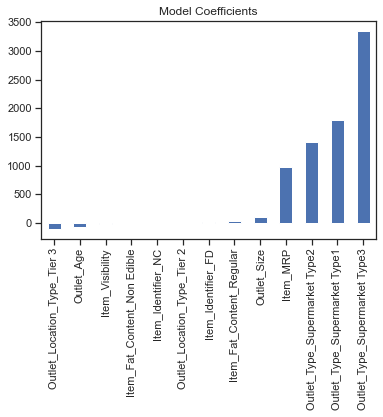

In [67]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 1817365.3636449075
CV Score: 1819962.8870777688


<AxesSubplot:title={'center':'Model Coefficients'}>

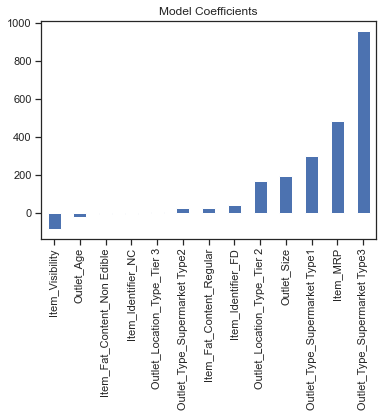

In [68]:
model = Ridge(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 1273442.7960762654
CV Score: 1278049.4514705283


<AxesSubplot:title={'center':'Model Coefficients'}>

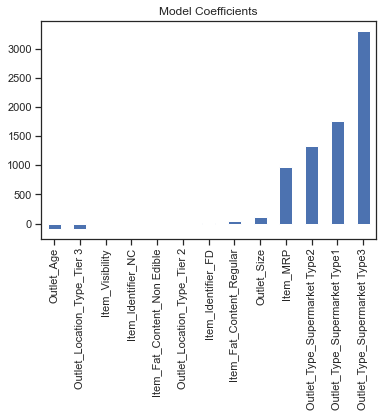

In [69]:
model = Lasso()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 0.0
CV Score: 2367322.7601582585


<AxesSubplot:title={'center':'Feature Importance'}>

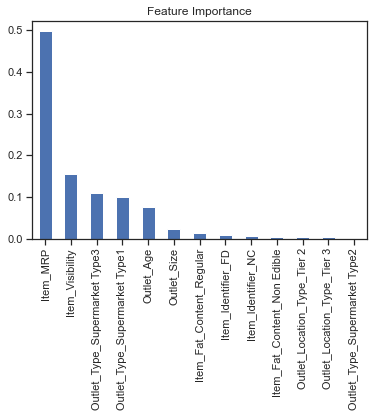

In [70]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

Model Report
MSE: 186720.02088297572
CV Score: 1335688.4273360868


<AxesSubplot:title={'center':'Feature Importance'}>

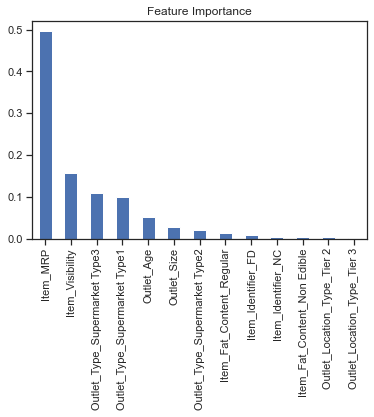

In [71]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")